In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import requests
import time

In [200]:
heart_study = pd.read_csv("Resources/Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv",dtype={"Year": "str"})

In [201]:
heart_study.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [202]:
heart_study.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [203]:
# Dropping columns our group determined is insignificant to our analysis
heart_study.drop(["GeographicLevel",
                  "DataSource",
                  "Class",
                  "Data_Value_Unit",
                  "Data_Value_Type",
                  "Data_Value_Footnote_Symbol",
                  "Data_Value_Footnote",
                  "StratificationCategory1",
                  "StratificationCategory2",
                  "StratificationCategory3",
                  "LocationID"], axis = 1, inplace = True)

# Renaming columns accordingly
heart_study.rename(columns={
    "LocationAbbr": "State",
    "LocationDesc": "County",
    "Stratification1": "Age Group",
    "Stratification2": "Ethnicity",
    "Stratification3": "Sex"
},
    inplace=True)

heart_study.head()

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
0,1999,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [204]:
heart_study.shape

(5770240, 10)

In [205]:
heart_study["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017', '1999 - 2010',
       '2010 - 2019'], dtype=object)

In [206]:
# Dropping rows containing "1999-2010" and "2010-2019"
heart_study_cleaned = heart_study[(heart_study.Year != "1999 - 2010") & (heart_study.Year != "2010 - 2019")]
heart_study_cleaned["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017'], dtype=object)

In [207]:
# Dropping rows that contain missing values
heart_study_cleaned = heart_study_cleaned.dropna(0)

heart_study_cleaned

C:\Users\Lauren Golden\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
53,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall
79,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men
106,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men
108,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...
5268494,2006,WY,Weston,Heart failure,589.3,465.9,704.8,Ages 65 years and older,White,Overall
5268495,2013,WY,Weston,Heart failure,474.9,403.2,551.1,Ages 65 years and older,White,Overall
5268496,2004,WY,Weston,Heart failure,600.2,466.8,706.1,Ages 65 years and older,White,Overall
5268497,2005,WY,Weston,Heart failure,594.9,458.2,719.7,Ages 65 years and older,White,Overall


In [208]:
heart_study_year = heart_study_cleaned.groupby(["Year"]).mean()
heart_study_year

,Data_Value,Confidence_limit_Low,Confidence_limit_High
Year,,,
1999,654.378824,563.267758,761.907737
2000,637.858300,556.334273,732.994773
2001,617.989555,541.885747,706.329304
2002,608.264816,534.245364,694.097351
2003,589.616238,516.639549,674.314532
2004,550.562482,483.782313,627.901447
2005,539.879701,474.494108,615.581625
2006,508.711408,446.679683,580.564862
2007,487.687681,428.683872,555.936549


In [209]:
nj_study = heart_study_cleaned.loc[(heart_study_cleaned["State"] == "NJ") &
                                   (heart_study_cleaned["Ethnicity"] == "Overall"), :]
nj_study

,Year,State,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
2961036,2000,NJ,Bergen,All stroke,9.4,7.9,11.2,Ages 35-64 years,Overall,Women
2961284,2014,NJ,Bergen,All stroke,5.8,5.0,6.9,Ages 35-64 years,Overall,Women
2961313,2015,NJ,Bergen,All stroke,5.4,4.6,6.4,Ages 35-64 years,Overall,Women
2961399,2001,NJ,Bergen,All stroke,8.4,7.2,10.2,Ages 35-64 years,Overall,Women
2961507,1999,NJ,Bergen,All stroke,9.1,7.4,11.0,Ages 35-64 years,Overall,Women
...,...,...,...,...,...,...,...,...,...,...
3005097,2009,NJ,Warren,Heart failure,418.8,362.2,475.4,Ages 65 years and older,Overall,Men
3005098,2001,NJ,Warren,Heart failure,529.1,458.8,603.2,Ages 65 years and older,Overall,Men
3005099,2000,NJ,Warren,Heart failure,569.2,487.7,655.4,Ages 65 years and older,Overall,Men
3005100,2006,NJ,Warren,Heart failure,435.4,385.3,498.0,Ages 65 years and older,Overall,Men


In [210]:
nj_study["Topic"].unique()

array(['All stroke', 'Heart failure', 'All heart disease',
       'Coronary heart disease (CHD)', 'Cardiovascular disease (CVD)'],
      dtype=object)

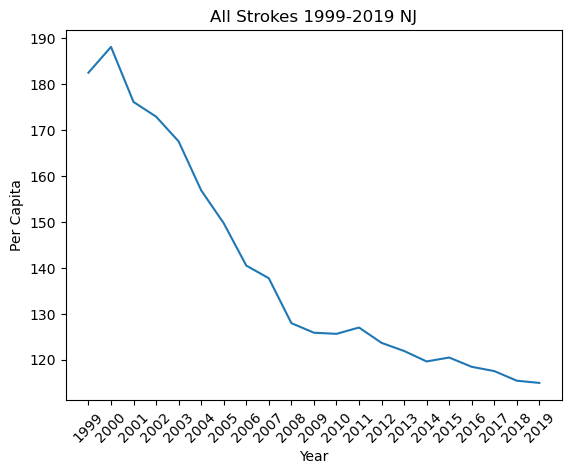

In [211]:
nj_all_stroke = nj_study.loc[nj_study["Topic"] == "All stroke"].groupby("Year").mean()
nj_all_stroke = nj_all_stroke.reset_index()
plt.plot(nj_all_stroke["Year"], nj_all_stroke["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("All Strokes 1999-2019 NJ")
plt.show()

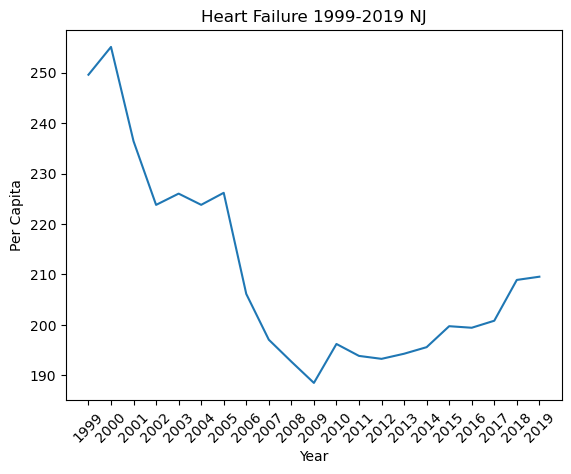

In [212]:
nj_heart_failure = nj_study.loc[nj_study["Topic"] == "Heart failure"].groupby("Year").mean()
nj_heart_failure = nj_heart_failure.reset_index()
plt.plot(nj_heart_failure["Year"], nj_heart_failure["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Failure 1999-2019 NJ")
plt.show()

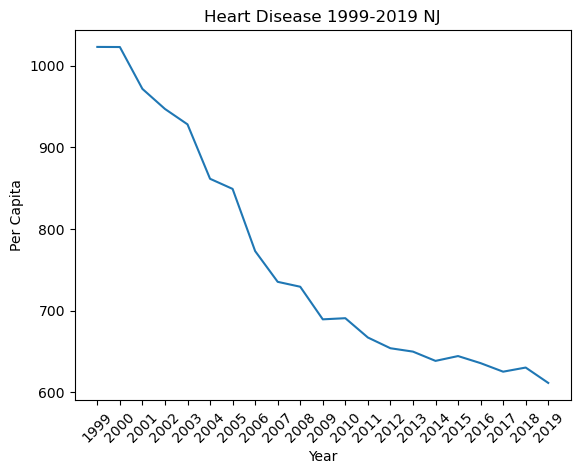

In [213]:
nj_heart_disease = nj_study.loc[nj_study["Topic"] == "All heart disease"].groupby("Year").mean()
nj_heart_disease = nj_heart_disease.reset_index()
plt.plot(nj_heart_disease["Year"], nj_heart_disease["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Heart Disease 1999-2019 NJ")
plt.show()

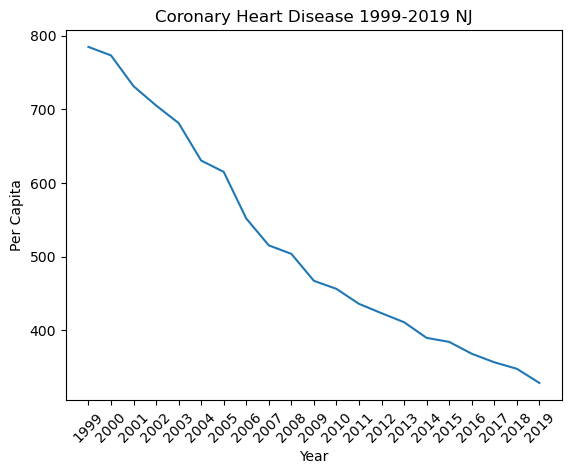

In [214]:
nj_coronary = nj_study.loc[nj_study["Topic"] == "Coronary heart disease (CHD)"].groupby("Year").mean()
nj_coronary = nj_coronary.reset_index()
plt.plot(nj_coronary["Year"], nj_coronary["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Coronary Heart Disease 1999-2019 NJ")
plt.show()

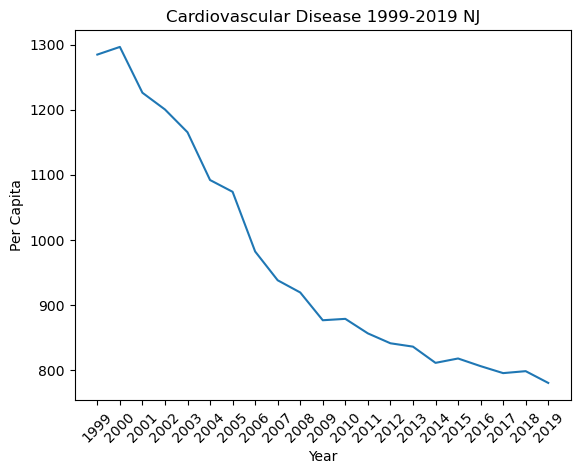

In [215]:
nj_cardiovascular = nj_study.loc[nj_study["Topic"] == "Cardiovascular disease (CVD)"].groupby("Year").mean()
nj_cardiovascular = nj_cardiovascular.reset_index()
plt.plot(nj_cardiovascular["Year"], nj_cardiovascular["Data_Value"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Cardiovascular Disease 1999-2019 NJ")
plt.show()

In [216]:
nj_by_county = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]
nj_by_county

Year  County    
1999  Atlantic      741.006667
      Bergen        642.330000
      Burlington    707.880000
      Camden        723.123333
      Cape May      635.543333
                       ...    
2019  Salem         494.360000
      Somerset      349.176667
      Sussex        426.910000
      Union         360.753333
      Warren        438.080000
Name: Data_Value, Length: 441, dtype: float64

In [217]:
nj_by_county = nj_study.groupby(["Year", "County"]).mean()["Data_Value"]
nj_by_county = nj_by_county.unstack()
nj_by_county = nj_by_county.T

nj_by_county

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,,,,,,,,,,,,
Atlantic,741.006667,802.100000,768.306667,750.036667,765.923333,705.653333,674.213333,594.873333,560.886667,544.436667,...,508.210000,506.046667,479.446667,477.140000,484.996667,490.756667,491.760000,482.546667,479.596667,454.843333
Bergen,642.330000,632.936667,588.116667,585.593333,548.466667,503.983333,498.413333,465.166667,435.990000,433.643333,...,403.103333,384.896667,371.636667,376.856667,362.120000,359.180000,352.096667,343.203333,337.813333,339.313333
Burlington,707.880000,711.336667,674.170000,663.763333,650.206667,612.000000,587.923333,515.093333,506.573333,490.583333,...,457.476667,440.973333,415.640000,406.666667,404.443333,429.040000,415.253333,414.183333,423.340000,420.636667
Camden,723.123333,722.950000,680.156667,669.280000,648.490000,596.856667,586.823333,540.233333,517.400000,502.043333,...,490.220000,492.620000,471.653333,472.196667,459.676667,455.316667,444.843333,451.726667,457.883333,443.516667
Cape May,635.543333,708.906667,680.360000,662.626667,670.926667,627.963333,686.823333,614.496667,565.006667,566.450000,...,533.123333,521.083333,516.050000,517.110000,499.003333,504.356667,514.390000,498.106667,491.683333,464.106667
Cumberland,808.433333,818.343333,791.993333,760.766667,768.050000,728.780000,730.710000,615.376667,573.200000,551.053333,...,544.753333,539.556667,536.413333,539.260000,539.226667,545.923333,538.966667,550.246667,529.860000,518.646667
Essex,695.220000,681.863333,658.393333,645.750000,610.356667,581.116667,563.873333,534.903333,514.160000,517.803333,...,493.110000,472.700000,448.253333,448.473333,415.773333,417.693333,407.296667,383.646667,389.800000,366.023333
Gloucester,718.893333,759.710000,719.690000,718.996667,716.363333,656.106667,654.110000,560.983333,516.093333,509.786667,...,482.623333,483.473333,480.370000,482.696667,466.006667,476.356667,482.740000,490.490000,499.556667,486.710000
Hudson,756.180000,715.266667,686.323333,677.306667,655.630000,636.146667,638.406667,586.680000,554.906667,553.556667,...,488.033333,469.126667,444.183333,440.540000,410.063333,391.683333,378.030000,360.030000,347.150000,327.850000


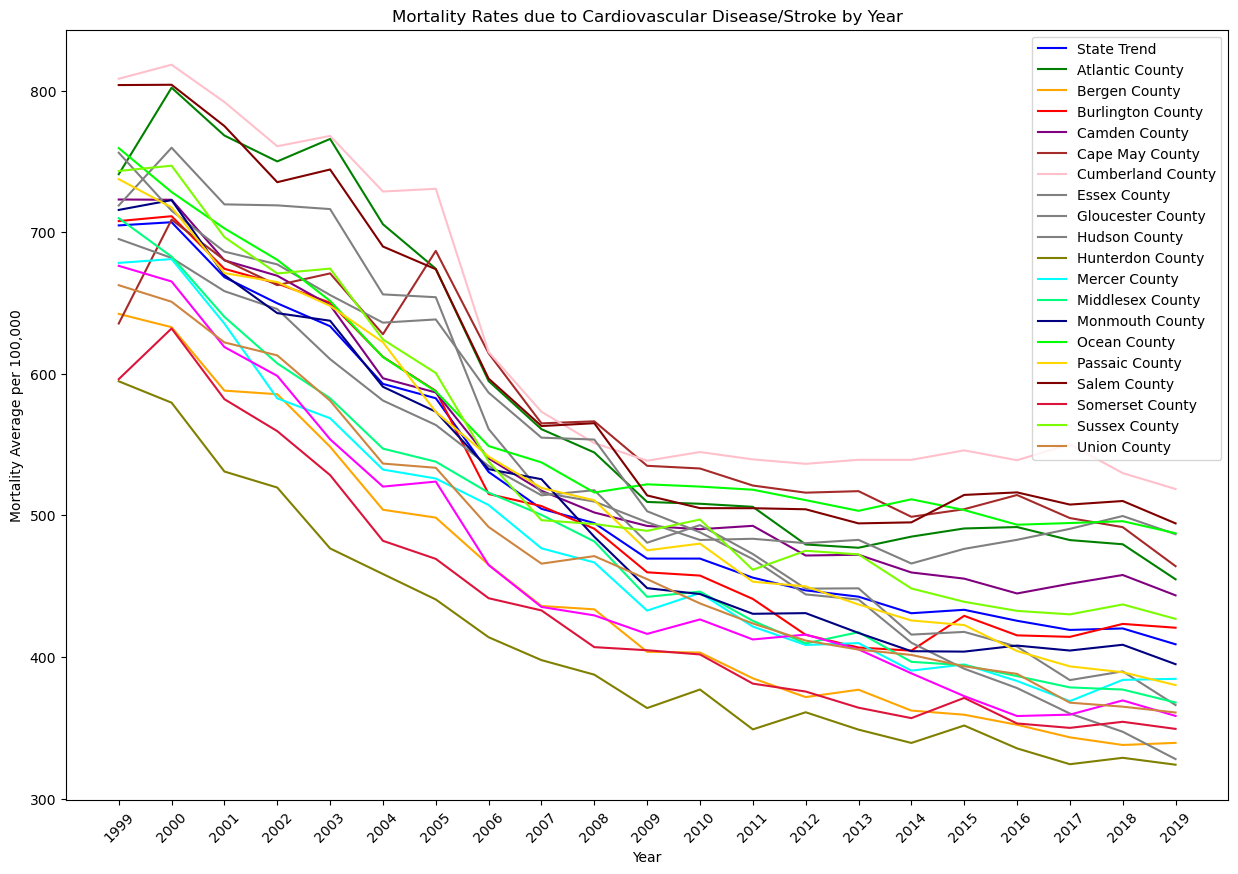

In [218]:
years = nj_by_county.keys()
state_trend = nj_by_county.mean()

plt.figure(figsize=(15,10))
nj_state, = plt.plot(years, state_trend, color="blue", label="State Trend" )

Atlantic, = plt.plot(years, nj_by_county.loc['Atlantic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="green",label="Atlantic County")
Bergen, = plt.plot(years, nj_by_county.loc['Bergen',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="orange",label="Bergen County")
Burlington, = plt.plot(years, nj_by_county.loc['Burlington',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="red",label="Burlington County")

Camden, = plt.plot(years, nj_by_county.loc['Camden',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="purple",label="Camden County")

CapeMay, = plt.plot(years, nj_by_county.loc['Cape May',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="brown",label="Cape May County")
Cumberland, = plt.plot(years, nj_by_county.loc['Cumberland',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="pink",label="Cumberland County")

Essex, = plt.plot(years, nj_by_county.loc['Essex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Essex County")

Gloucester, = plt.plot(years, nj_by_county.loc['Gloucester',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Gloucester County")

Hudson, = plt.plot(years, nj_by_county.loc['Hudson',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gray",label="Hudson County")

Hunterdon, = plt.plot(years, nj_by_county.loc['Hunterdon',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="olive",label="Hunterdon County")
Mercer, = plt.plot(years, nj_by_county.loc['Mercer',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="cyan",label="Mercer County")
Middlesex, = plt.plot(years, nj_by_county.loc['Middlesex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="springgreen",label="Middlesex County")
Monmouth, = plt.plot(years, nj_by_county.loc['Monmouth',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="navy",label="Monmouth County")
Morris, = plt.plot(years, nj_by_county.loc['Morris',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="fuchsia",label="Morris County")
Ocean, = plt.plot(years, nj_by_county.loc['Ocean',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lime",label="Ocean County")
Passaic, = plt.plot(years, nj_by_county.loc['Passaic',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="gold",label="Passaic County")
Salem, = plt.plot(years, nj_by_county.loc['Salem',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="maroon",label="Salem County")
Somerset, = plt.plot(years, nj_by_county.loc['Somerset',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="crimson",label="Somerset County")
Sussex, = plt.plot(years, nj_by_county.loc['Sussex',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="lawngreen",label="Sussex County")
Union, = plt.plot(years, nj_by_county.loc['Union',["1999","2000","2001","2002","2003","2004","2005",
                                                         "2006","2007","2008","2009","2010","2011","2012",
                                                         "2013","2014","2015","2016","2017","2018","2019"]], 
                        color="peru",label="Union County")
plt.legend(handles=[nj_state, Atlantic, Bergen, Burlington, Camden, CapeMay, Cumberland, Essex, Gloucester,
                   Hudson,Hunterdon,Mercer,Middlesex,Monmouth,Ocean,Passaic,Salem,Somerset,Sussex,Union], loc="best")

plt.title("Mortality Rates due to Cardiovascular Disease/Stroke by Year")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

# Import Chronic Disease CSV

In [231]:
chronic_df = pd.read_csv("Resources/U.S._Chronic_Disease_Indicators__CDI_.csv")
chronic_df.head()

C:\Users\Lauren Golden\anaconda3\envs\pythondata\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [232]:
chronic_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [233]:
# Dropping columns our group determined is insignificant to our analysis
chronic_df.drop(["YearStart",
                 "LocationDesc",
                 "DataSource",
                 "Response",
                 "DataValueFootnoteSymbol",
                 "DatavalueFootnote",
                 "Stratification1",
                 "StratificationCategory2",
                 "Stratification2",
                 "StratificationCategory3",
                 "Stratification3",
                 "ResponseID",
                 "LocationID",
                 "TopicID",
                 "QuestionID",
                 "DataValueTypeID",
                 "StratificationCategoryID1",
                 "StratificationID1",
                 "StratificationCategoryID2",
                 "StratificationID2",
                 "StratificationCategoryID3",
                 "StratificationID3"], axis = 1, inplace = True)

# Renaming columns accordingly
chronic_df.rename(columns={
    "YearEnd": "Year",
    "LocationAbbr": "State",
    "StratificationCategory1": "Ethnicity-Sex"
},
    inplace=True)

chronic_df.head()

,Year,State,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,Ethnicity-Sex,GeoLocation
0,2014,AR,Asthma,Hospitalizations for asthma,NaN,Number,916,916.0,NaN,NaN,Gender,POINT (-92.27449074299966 34.74865012400045)
1,2018,CO,Asthma,Hospitalizations for asthma,NaN,Number,2227,2227.0,NaN,NaN,Overall,POINT (-106.13361092099967 38.843840757000464)
2,2018,DC,Asthma,Hospitalizations for asthma,NaN,Number,708,708.0,NaN,NaN,Overall,POINT (-77.036871 38.907192)
3,2017,GA,Asthma,Hospitalizations for asthma,NaN,Number,3520,3520.0,NaN,NaN,Gender,POINT (-83.62758034599966 32.83968109300048)
4,2010,MI,Asthma,Hospitalizations for asthma,NaN,Number,123,123.0,NaN,NaN,Race/Ethnicity,POINT (-84.71439026999968 44.6613195430005)


In [234]:
smoking_df = chronic_df.loc[(chronic_df["Topic"] == "Tobacco") &
                            (chronic_df["Question"] == "Current smoking among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
smoking_df = smoking_df.groupby(["Year", "State"]).mean()

smoking_df

DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
Year State                                                       
2011 AK             22.9                21.0                 25.0
     AL             24.3                22.9                 25.8
     AR             27.0                24.8                 29.2
     AZ             19.3                17.3                 21.4
     CA             13.7                12.9                 14.4
...                  ...                 ...                  ...
2021 VT             14.8                13.5                 16.2
     WA             10.7                10.0                 11.5
     WI             13.3                12.0                 14.7
     WV             22.0                20.7                 23.3
     WY             16.4                14.8                 18.2

[605 rows x 3 columns]

In [235]:
diabetes_df = chronic_df.loc[(chronic_df["Topic"] == "Diabetes") &
                            (chronic_df["Question"] == "Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
diabetes_df = diabetes_df.groupby(["Year", "State"]).mean()

diabetes_df

DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
Year State                                                       
2011 AK             63.5                53.1                 72.8
     AL             56.1                51.5                 60.6
     AR             50.3                44.4                 56.3
     AZ             52.5                45.6                 59.2
     CA             58.8                53.2                 64.1
...                  ...                 ...                  ...
2021 VT              NaN                 NaN                  NaN
     WA              NaN                 NaN                  NaN
     WI             61.1                55.6                 66.3
     WV              NaN                 NaN                  NaN
     WY             55.9                49.8                 61.9

[605 rows x 3 columns]

In [236]:
obesity_df = chronic_df.loc[(chronic_df["Topic"] == "Nutrition, Physical Activity, and Weight Status") &
                            (chronic_df["Question"] == "Obesity among adults aged >= 18 years") &
                            (chronic_df["DataValueType"] == "Crude Prevalence") &
                            (chronic_df["Ethnicity-Sex"] == "Overall")]
obesity_df = obesity_df.groupby(["Year", "State"]).mean()

obesity_df

DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
Year State                                                       
2011 AK             27.4                25.3                 29.7
     AL             32.0                30.5                 33.5
     AR             30.9                28.8                 33.1
     AZ             25.1                23.0                 27.3
     CA             23.8                22.9                 24.7
...                  ...                 ...                  ...
2021 VT             29.0                27.4                 30.7
     WA             28.8                27.7                 29.9
     WI             33.9                32.1                 35.7
     WV             40.6                39.1                 42.1
     WY             32.0                29.9                 34.1

[605 rows x 3 columns]

In [237]:
# Create a dataframe to consolidate the Mortality Rate for the nation by year
heart_study_year = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall") & 
                                                (heart_study_cleaned["Sex"] == "Overall")]
heart_study_year = heart_study_year.groupby(["Year"]).mean()
heart_study_year = heart_study_year.drop(["Confidence_limit_Low", "Confidence_limit_High"], axis=1)
heart_study_year = heart_study_year.reset_index()
heart_study_year

,Year,Data_Value
0,1999,700.612000
1,2000,684.192580
2,2001,663.015043
3,2002,652.106568
4,2003,631.975420
5,2004,590.138575
6,2005,578.539833
7,2006,545.439401
8,2007,523.330919
9,2008,515.268345


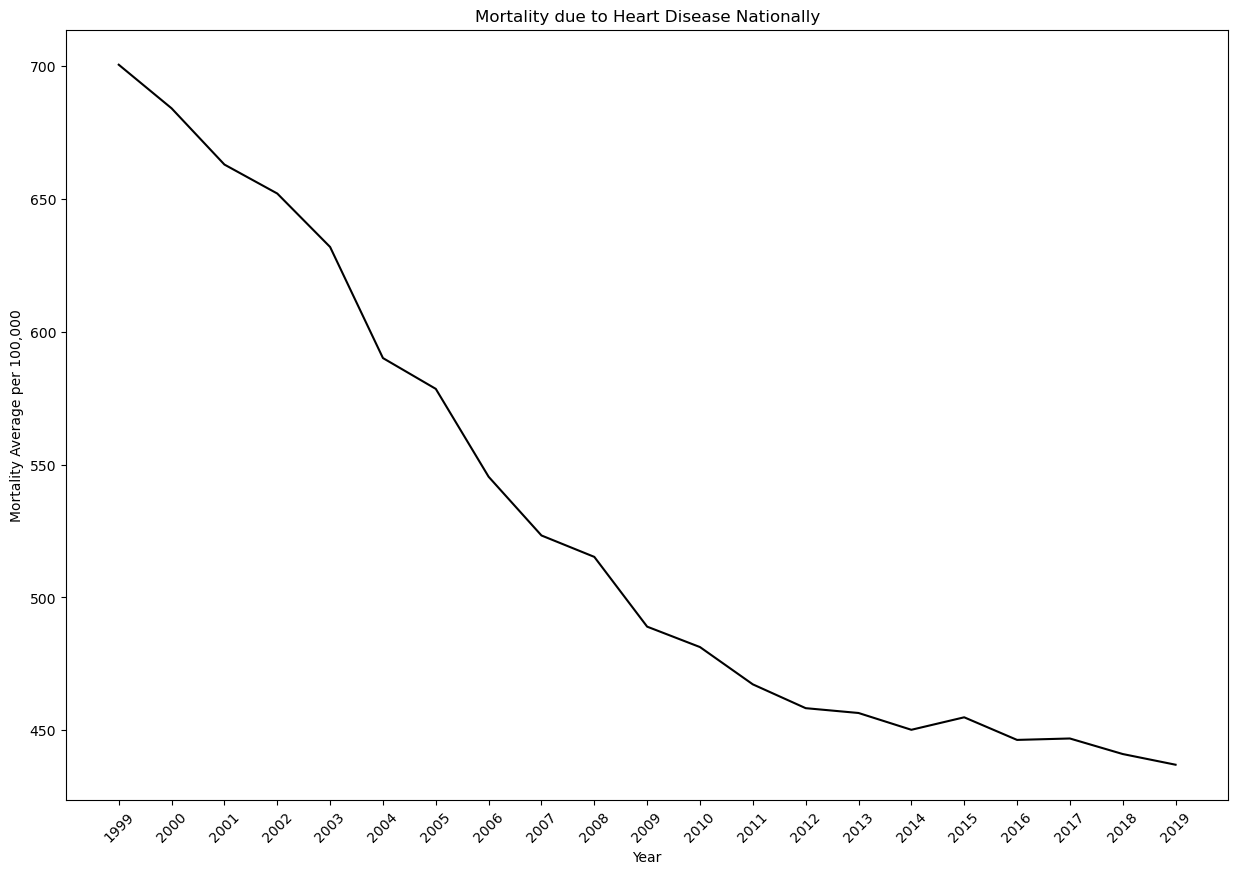

In [238]:
# Create a plot for the national heart disease mortality rate
years = heart_study_year["Year"]

plt.figure(figsize=(15,10))
Overall, = plt.plot(years, heart_study_year["Data_Value"], color = "black", label = "Overall")
plt.title("Mortality due to Heart Disease Nationally")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

In [239]:
# Confirm ethnicity values
heart_study_cleaned["Ethnicity"].unique()

array(['Overall', 'Black (Non-Hispanic)', 'Hispanic', 'White',
       'American Indian/Alaska Native', 'Asian/Pacific Islander'],
      dtype=object)

In [240]:
# Create ethnicity dataframe
heart_study_ethnicity1 = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] != "Overall") & 
                                                (heart_study_cleaned["Sex"] != "Male") & 
                                                (heart_study_cleaned["Sex"] != "Female")]

heart_by_ethnicity = heart_study_ethnicity1.groupby(["Year", "Ethnicity"]).mean()["Data_Value"]
heart_by_ethnicity = heart_by_ethnicity.unstack()
heart_by_ethnicity = heart_by_ethnicity.T
heart_by_ethnicity


Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ethnicity,,,,,,,,,,,,,,,,,,,,,
American Indian/Alaska Native,309.647124,292.732000,283.469295,285.032152,304.609067,288.035200,276.352419,272.531352,260.070933,245.199238,...,242.620114,245.660952,232.566819,241.305676,242.132419,243.039886,234.399695,236.037981,226.250629,220.062667
Asian/Pacific Islander,260.403617,250.238577,246.055375,234.136996,229.028992,217.828992,211.837098,201.466811,193.126318,189.045035,...,183.093564,166.817710,165.067720,166.616407,158.263653,160.089220,157.034630,156.361303,159.466219,157.021935
Black (Non-Hispanic),664.355559,655.659509,639.191627,629.796558,616.308460,575.330439,557.920869,527.959294,510.274139,487.500370,...,456.197014,434.531299,425.952771,425.300921,419.547762,421.251299,420.164337,418.242186,416.185620,411.326325
Hispanic,308.168737,289.338037,280.159487,276.050911,262.977685,241.658379,243.783680,224.168607,216.656420,206.344947,...,193.237114,183.033957,180.341528,179.032408,177.090427,181.082665,177.554429,175.063067,173.924304,173.623047
White,699.469520,684.061490,662.246393,651.801597,630.943607,589.939607,578.380943,544.842799,522.245088,516.265921,...,482.319793,469.628344,460.871566,458.661463,453.231100,459.045988,450.330107,451.615558,445.766864,442.112896


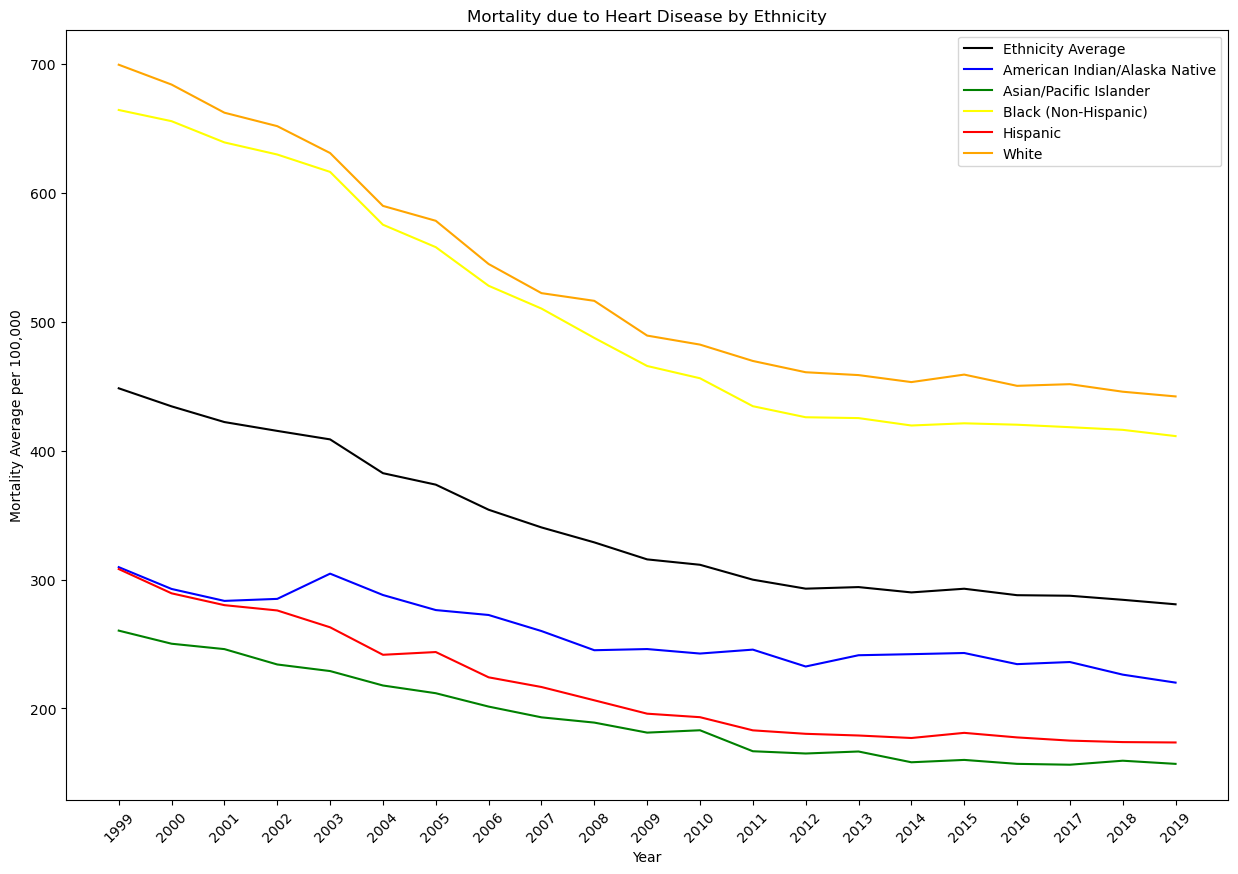

In [241]:
# Plot ethnicity data frame on a line plot
years = heart_by_ethnicity.keys()
ethnicity_trend = heart_by_ethnicity.mean()

plt.figure(figsize=(15,10))
ethnicity, = plt.plot(years, ethnicity_trend, color = "black", label = "Ethnicity Average")

American_Indian, = plt.plot(years, heart_by_ethnicity.loc["American Indian/Alaska Native", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="American Indian/Alaska Native")

Asian, = plt.plot(years, heart_by_ethnicity.loc["Asian/Pacific Islander", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="green", label="Asian/Pacific Islander")

Black, = plt.plot(years, heart_by_ethnicity.loc["Black (Non-Hispanic)", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="yellow", label="Black (Non-Hispanic)")

Hispanic, = plt.plot(years, heart_by_ethnicity.loc["Hispanic", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Hispanic")

White, = plt.plot(years, heart_by_ethnicity.loc["White", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="orange", label="White")

plt.legend(handles=[ethnicity, American_Indian, Asian, Black, Hispanic, White], loc="best")
plt.title("Mortality due to Heart Disease by Ethnicity")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

In [242]:
ethnicity_df = heart_study_ethnicity1.groupby(["Year", "Ethnicity"]).mean()["Data_Value"]
ethnicity_df = ethnicity_df.reset_index()
ethnicity_df

,Year,Ethnicity,Data_Value
0,1999,American Indian/Alaska Native,309.647124
1,1999,Asian/Pacific Islander,260.403617
2,1999,Black (Non-Hispanic),664.355559
3,1999,Hispanic,308.168737
4,1999,White,699.469520
...,...,...,...
100,2019,American Indian/Alaska Native,220.062667
101,2019,Asian/Pacific Islander,157.021935
102,2019,Black (Non-Hispanic),411.326325
103,2019,Hispanic,173.623047


<AxesSubplot:title={'center':'Data_Value'}, xlabel='Ethnicity'>

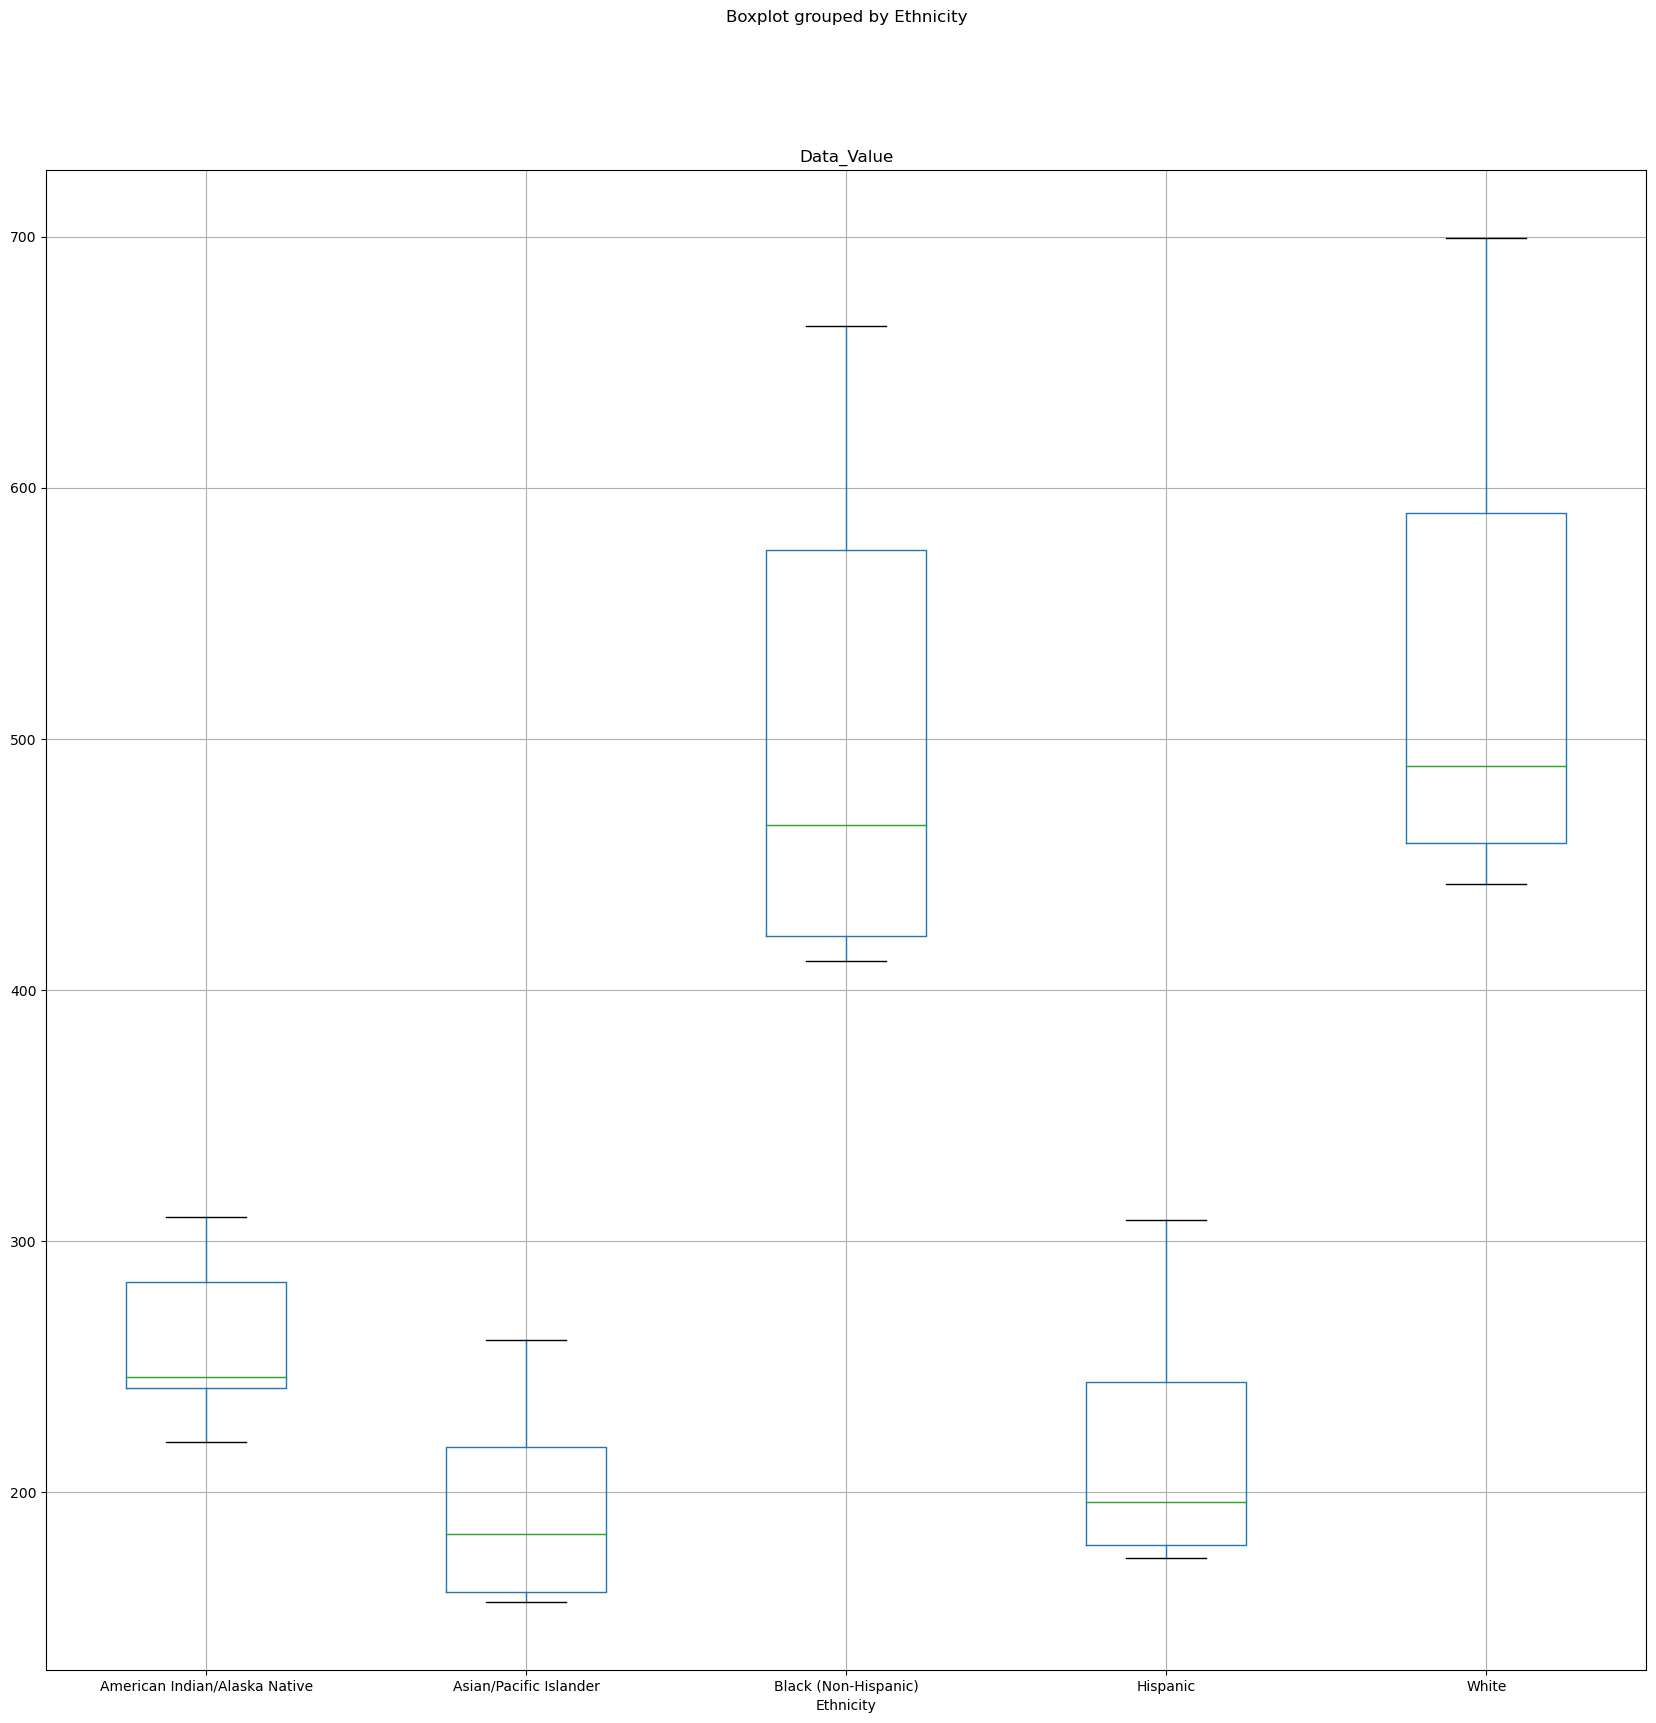

In [243]:
ethnicity_df.boxplot("Data_Value", by = "Ethnicity", figsize=(20,20))

In [244]:
# Extract individual groups
american_indian = ethnicity_df[ethnicity_df["Ethnicity"]== "American Indian/Alaska Native"]["Data_Value"]
asian = ethnicity_df[ethnicity_df["Ethnicity"]== "Asian/Pacific Islander"]["Data_Value"]
black = ethnicity_df[ethnicity_df["Ethnicity"]== "Black (Non-Hispanic)"]["Data_Value"]
hispanic = ethnicity_df[ethnicity_df["Ethnicity"]== "Hispanic"]["Data_Value"]
white = ethnicity_df[ethnicity_df["Ethnicity"]== "White"]["Data_Value"]

In [246]:
stats.f_oneway(american_indian, asian, black, hispanic, white)

F_onewayResult(statistic=138.44710943597417, pvalue=7.3307770787256145e-40)

Takeaway: The data is too widely varied, that this could be by chance or attributed to other factors not explored here. The p-value is too large to support the null hypothesis.

In [247]:
# Create dataframe by sex
heart_study_sex = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall")]

heart_by_sex = heart_study_sex.groupby(["Year", "Sex"]).mean()["Data_Value"]
heart_by_sex = heart_by_sex.unstack()
heart_by_sex = heart_by_sex.T
heart_by_sex

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Sex,,,,,,,,,,,,,,,,,,,,,
Men,829.355662,804.955001,775.794398,766.133699,738.548127,688.869743,676.105542,638.550811,609.096408,599.923685,...,566.806857,550.170653,539.658557,541.526926,535.005228,536.830749,530.413708,533.684784,527.753170,523.255516
Overall,700.612000,684.192580,663.015043,652.106568,631.975420,590.138575,578.539833,545.439401,523.330919,515.268345,...,481.302201,467.262993,458.296551,456.481379,450.153041,454.856296,446.344130,446.878552,441.026452,436.999542
Women,598.888721,585.558343,569.630800,559.143147,543.463951,507.767821,498.705812,467.862697,449.072654,442.021886,...,406.985069,396.296067,386.630703,381.703574,375.370861,381.287476,370.741328,368.873366,362.878624,358.926678


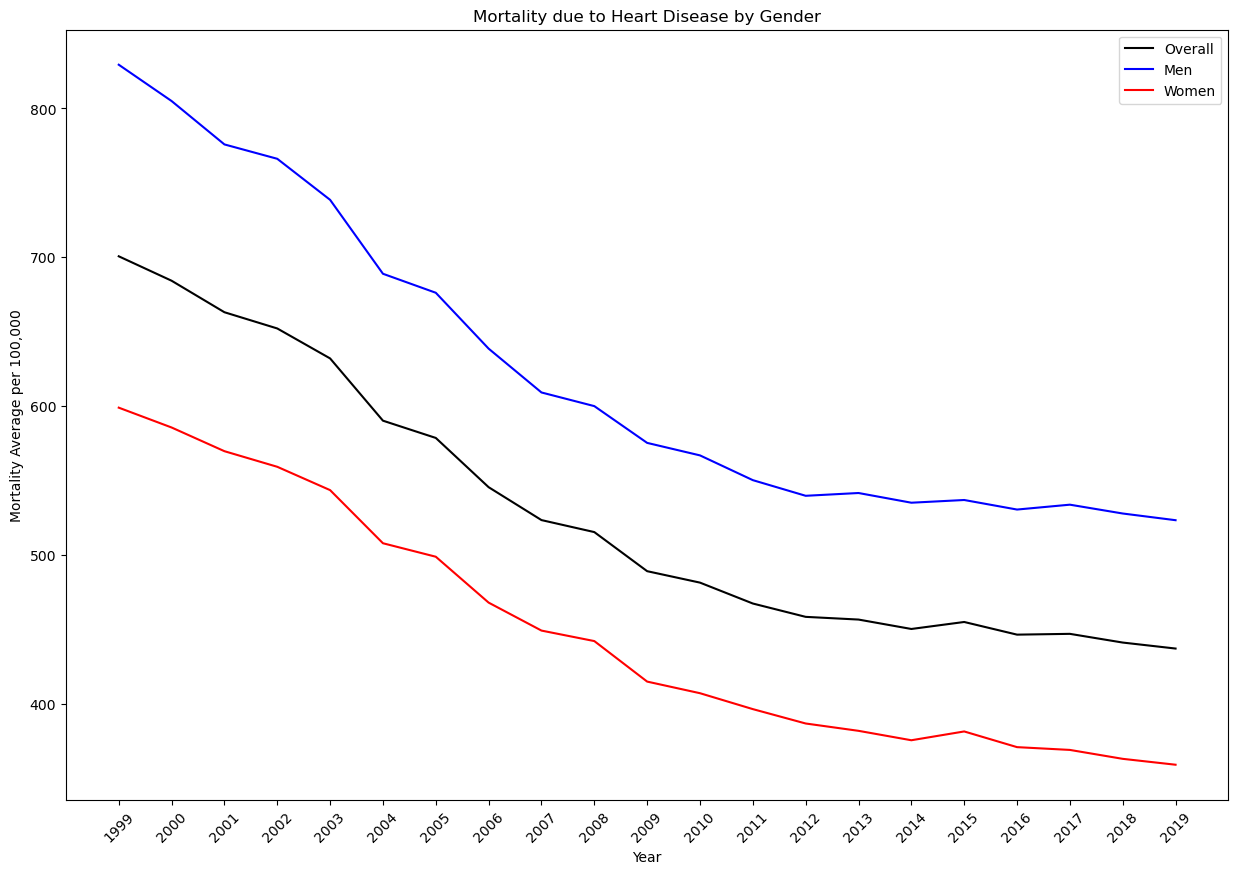

In [248]:
# Plot dataframe by sex
years = heart_by_sex.keys()

plt.figure(figsize=(15,10))
Overall, = plt.plot(years, heart_by_sex.loc["Overall", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="black", label="Overall")

Men, = plt.plot(years, heart_by_sex.loc["Men", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="Men")

Women, = plt.plot(years, heart_by_sex.loc["Women", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Women")

plt.legend(handles=[Overall, Men, Women], loc="best")
plt.title("Mortality due to Heart Disease by Gender")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

In [249]:
# Create dataframe by age group
heart_study_age = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall")& 
                                                (heart_study_cleaned["Sex"] == "Overall")]

heart_by_age = heart_study_age.groupby(["Year", "Age Group"]).mean()["Data_Value"]
heart_by_age = heart_by_age.unstack()
heart_by_age = heart_by_age.T
heart_by_age

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Age Group,,,,,,,,,,,,,,,,,,,,,
Ages 35-64 years,87.650973,86.585178,84.235204,83.411525,81.862440,77.665049,76.642024,75.360551,73.066351,72.840123,...,70.764496,70.637944,71.215907,71.691651,73.201758,73.878190,74.504022,74.223587,74.485722,74.023192
Ages 65 years and older,1325.536209,1293.463506,1253.090949,1231.900853,1192.824975,1112.614065,1090.229960,1024.689762,982.380410,966.328598,...,899.849735,871.626429,852.929365,848.778578,834.458862,843.267507,825.439054,826.804233,814.718604,807.057771


In [250]:
# Confirm age group values
heart_study["Age Group"].unique()

array(['Ages 35-64 years', 'Ages 65 years and older'], dtype=object)

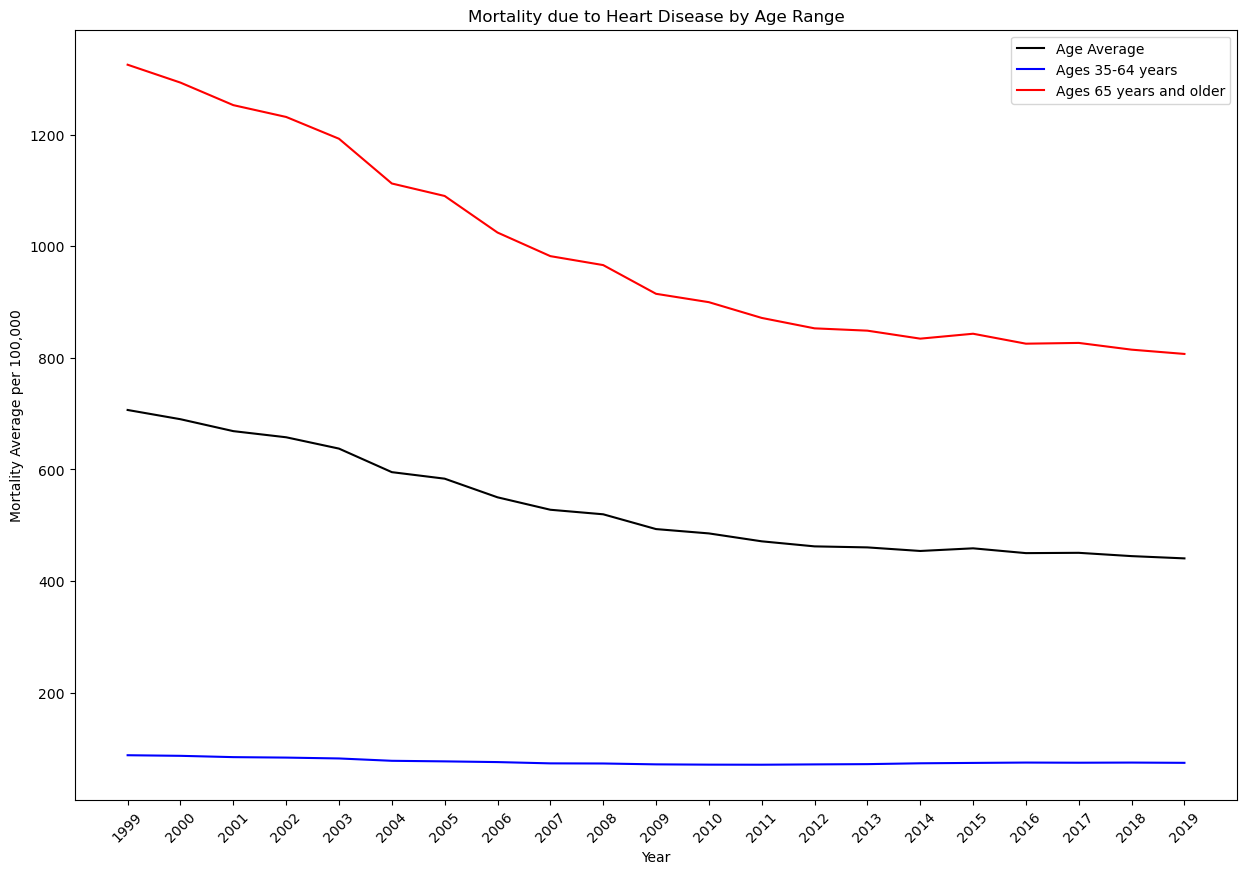

In [251]:
# Plot dataframe by age
years = heart_by_age.keys()
age_trend = heart_by_age.mean()

plt.figure(figsize=(15,10))
Age, = plt.plot(years, age_trend, color = "black", label = "Age Average")

Age35_64, = plt.plot(years, heart_by_age.loc["Ages 35-64 years", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="Ages 35-64 years")

Age65, = plt.plot(years, heart_by_age.loc["Ages 65 years and older", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Ages 65 years and older")

plt.legend(handles=[Age, Age35_64, Age65], loc="best")
plt.title("Mortality due to Heart Disease by Age Range")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

### Integrate census data created from Census API

In [264]:
# Import Population Census CSV

census_data = pd.read_csv("Output/final_census_data_2000-2019.csv",dtype={"Year": "str"})
census_data = census_data.drop("Unnamed: 0", axis = 1)
census_data

,Year,County,Population Estimate,Unnamed: 0.1,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE
0,2000,Atlantic,253674,1.0,9.5,2.0,23804.0,4991.0
1,2001,Atlantic,255737,2.0,9.7,2.1,24621.0,5281.0
2,2002,Atlantic,259263,3.0,10.1,2.2,26111.0,5785.0
3,2003,Atlantic,263285,4.0,10.8,2.4,28422.0,6296.0
4,2004,Atlantic,267723,5.0,10.0,2.3,26674.0,6133.0
...,...,...,...,...,...,...,...,...
352,2012,Warren,107563,373.0,6.9,1.4,7285.0,1441.0
353,2013,Warren,106897,374.0,8.7,1.5,9194.0,1551.0
354,2014,Warren,106981,375.0,8.3,1.5,8747.0,1594.0
355,2015,Warren,106742,376.0,7.7,1.4,8040.0,1478.0


In [265]:
# Calculate values and append dataframe to include these values
adjusted_pop = census_data["Population Estimate"]/100000
census_data["Adjusted Population"] = adjusted_pop
census_data = census_data[["Year", "County", "Population Estimate", "Adjusted Population", "Poverty Rate",
                          "Poverty Rate MOE", "Poverty Count Estimate", "Poverty Count MOE"]]
census_data

,Year,County,Population Estimate,Adjusted Population,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE
0,2000,Atlantic,253674,2.53674,9.5,2.0,23804.0,4991.0
1,2001,Atlantic,255737,2.55737,9.7,2.1,24621.0,5281.0
2,2002,Atlantic,259263,2.59263,10.1,2.2,26111.0,5785.0
3,2003,Atlantic,263285,2.63285,10.8,2.4,28422.0,6296.0
4,2004,Atlantic,267723,2.67723,10.0,2.3,26674.0,6133.0
...,...,...,...,...,...,...,...,...
352,2012,Warren,107563,1.07563,6.9,1.4,7285.0,1441.0
353,2013,Warren,106897,1.06897,8.7,1.5,9194.0,1551.0
354,2014,Warren,106981,1.06981,8.3,1.5,8747.0,1594.0
355,2015,Warren,106742,1.06742,7.7,1.4,8040.0,1478.0


In [266]:
# Merge Census Data with Heart Study Data
nj_census_merged = pd.merge(census_data, nj_by_county1, how = "left", on = ["Year", "County"])
nj_census_merged

,Year,County,Population Estimate,Adjusted Population,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value
0,2000,Atlantic,253674,2.53674,9.5,2.0,23804.0,4991.0,802.100000
1,2001,Atlantic,255737,2.55737,9.7,2.1,24621.0,5281.0,768.306667
2,2002,Atlantic,259263,2.59263,10.1,2.2,26111.0,5785.0,750.036667
3,2003,Atlantic,263285,2.63285,10.8,2.4,28422.0,6296.0,765.923333
4,2004,Atlantic,267723,2.67723,10.0,2.3,26674.0,6133.0,705.653333
...,...,...,...,...,...,...,...,...,...
352,2012,Warren,107563,1.07563,6.9,1.4,7285.0,1441.0,471.370000
353,2013,Warren,106897,1.06897,8.7,1.5,9194.0,1551.0,458.546667
354,2014,Warren,106981,1.06981,8.3,1.5,8747.0,1594.0,449.753333
355,2015,Warren,106742,1.06742,7.7,1.4,8040.0,1478.0,468.546667


In [267]:
# Calculate Heart Disease per County (adjusted for population)
total_heart_instances = nj_census_merged["Data_Value"] * nj_census_merged["Adjusted Population"]
percentage_heart_instances = nj_census_merged["Data_Value"]/100000
nj_census_merged["Total Mortality Instances"] = total_heart_instances
nj_census_merged["Percentage of Heart Instances"] = percentage_heart_instances
nj_census_merged = nj_census_merged[["Year", "County", "Population Estimate", "Poverty Rate", "Poverty Rate MOE", 
                                     "Poverty Count Estimate", "Poverty Count MOE", "Data_Value", "Adjusted Population",
                                    "Total Mortality Instances", "Percentage of Heart Instances"]]
nj_census_merged.head(20)

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
0,2000,Atlantic,253674,9.5,2.00,23804.0,4991.0,802.100000,2.53674,2034.719154,0.008021
1,2001,Atlantic,255737,9.7,2.10,24621.0,5281.0,768.306667,2.55737,1964.844420,0.007683
2,2002,Atlantic,259263,10.1,2.20,26111.0,5785.0,750.036667,2.59263,1944.567563,0.007500
3,2003,Atlantic,263285,10.8,2.40,28422.0,6296.0,765.923333,2.63285,2016.561248,0.007659
4,2004,Atlantic,267723,10.0,2.30,26674.0,6133.0,705.653333,2.67723,1889.196274,0.007057
5,2005,Atlantic,270332,9.4,1.35,24852.0,3513.0,674.213333,2.70332,1822.614388,0.006742
6,2006,Atlantic,271759,9.5,1.30,25264.0,3456.0,594.873333,2.71759,1616.621822,0.005949
7,2007,Atlantic,272303,11.9,1.60,31488.0,4159.0,560.886667,2.72303,1527.311220,0.005609
8,2008,Atlantic,273014,11.1,1.45,29498.0,3720.0,544.436667,2.73014,1486.388321,0.005444
9,2009,Atlantic,274049,10.9,1.60,28926.0,4342.0,509.480000,2.74049,1396.224845,0.005095


In [268]:
# Sort Data by Data_Value to determine the counties with the highest instances of mortality (when adjusted for population)
sorted_nj_census = nj_census_merged.sort_values(by = ["Data_Value", "County"], ascending = False)
sorted_nj_census.head(20)

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
85,2000,Cumberland,146263,13.7,2.95,18649.0,3971.0,818.343333,1.46263,1196.933510,0.008183
272,2000,Salem,64177,8.4,1.85,5326.0,1167.0,804.183333,0.64177,516.100738,0.008042
0,2000,Atlantic,253674,9.5,2.00,23804.0,4991.0,802.100000,2.53674,2034.719154,0.008021
86,2001,Cumberland,146451,13.9,3.00,18962.0,4152.0,791.993333,1.46451,1159.882157,0.007920
273,2001,Salem,64069,8.1,1.80,5139.0,1140.0,775.016667,0.64069,496.545428,0.007750
1,2001,Atlantic,255737,9.7,2.10,24621.0,5281.0,768.306667,2.55737,1964.844420,0.007683
88,2003,Cumberland,148437,14.9,3.35,20963.0,4719.0,768.050000,1.48437,1140.070378,0.007680
3,2003,Atlantic,263285,10.8,2.40,28422.0,6296.0,765.923333,2.63285,2016.561248,0.007659
87,2002,Cumberland,147294,14.5,3.25,20010.0,4527.0,760.766667,1.47294,1120.563654,0.007608
119,2000,Gloucester,256524,5.9,1.25,15054.0,3170.0,759.710000,2.56524,1948.838480,0.007597


In [269]:
# Create dataframe with Top 5 with highest mortality: Cumberland, Salem, Atlantic, Gloucester, Sussex
top_5 = nj_census_merged.loc[(nj_census_merged["County"] == "Atlantic") |
                            (nj_census_merged["County"] == "Cumberland")|
                            (nj_census_merged["County"] == "Gloucester") |
                            (nj_census_merged["County"] == "Salem") |
                            (nj_census_merged["County"] == "Sussex")]
top_5

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
0,2000,Atlantic,253674,9.5,2.0,23804.0,4991.0,802.100000,2.53674,2034.719154,0.008021
1,2001,Atlantic,255737,9.7,2.1,24621.0,5281.0,768.306667,2.55737,1964.844420,0.007683
2,2002,Atlantic,259263,10.1,2.2,26111.0,5785.0,750.036667,2.59263,1944.567563,0.007500
3,2003,Atlantic,263285,10.8,2.4,28422.0,6296.0,765.923333,2.63285,2016.561248,0.007659
4,2004,Atlantic,267723,10.0,2.3,26674.0,6133.0,705.653333,2.67723,1889.196274,0.007057
...,...,...,...,...,...,...,...,...,...,...,...
318,2012,Sussex,146979,6.2,1.1,9018.0,1568.0,474.996667,1.46979,698.145351,0.004750
319,2013,Sussex,145639,6.1,1.1,8779.0,1526.0,472.450000,1.45639,688.071456,0.004724
320,2014,Sussex,144593,6.2,1.1,8875.0,1641.0,448.376667,1.44593,648.321274,0.004484
321,2015,Sussex,143004,5.6,1.1,7958.0,1617.0,438.956667,1.43004,627.725592,0.004390


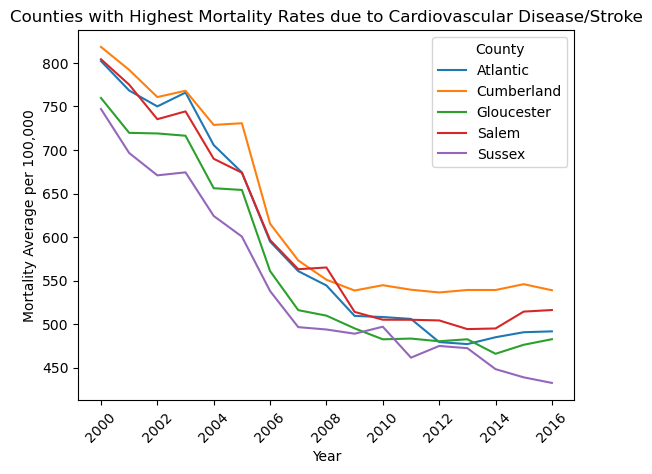

In [270]:
# Plot Graph with Top 5 with highest mortality: Cumberland, Salem, Atlantic, Gloucester, Sussex
top_5.pivot_table(values="Data_Value",index="Year",columns="County").plot()

plt.title("Counties with Highest Mortality Rates due to Cardiovascular Disease/Stroke")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

Takeaway: Four of the five lowest counties are in the South-Western part of the state of New Jersey, and the remaining county is in the uppermost northwestern region. These counties collectively are arguably farthest away from most of the cities, and some of the most rural and sparse portions of New Jersey. This could indicate that distance from medical care and lower population densities resulted in poorer outcomes for it's residents. Further analysis, however, is required to determine the other compounding factors for these regions.

In [271]:
# Sort Data by Data_Value to determine the counties with the lowest instances of mortality (when adjusted for population)
sorted_nj_census = nj_census_merged.sort_values(by = ["Data_Value", "County"], ascending = True)
sorted_nj_census.head(25)

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
169,2016,Hunterdon,124775,4.5,0.80,5431.0,921.0,335.410000,1.24775,418.507827,0.003354
167,2014,Hunterdon,125835,4.7,0.90,5742.0,1144.0,339.253333,1.25835,426.899432,0.003393
166,2013,Hunterdon,126376,4.1,0.90,5068.0,1091.0,348.656667,1.26376,440.618349,0.003487
164,2011,Hunterdon,127330,4.3,0.90,5370.0,1162.0,348.830000,1.27330,444.165239,0.003488
168,2015,Hunterdon,125452,5.0,0.90,6046.0,1085.0,351.560000,1.25452,441.039051,0.003516
33,2016,Bergen,928120,6.9,0.70,63789.0,6215.0,352.096667,9.28120,3267.879583,0.003521
305,2016,Somerset,329875,5.2,0.90,17318.0,2858.0,353.010000,3.29875,1164.491737,0.003530
303,2014,Somerset,329329,5.0,1.00,16496.0,3368.0,356.773333,3.29329,1174.958051,0.003568
237,2016,Morris,493801,5.4,0.80,26615.0,4134.0,358.270000,4.93801,1769.140843,0.003583
32,2015,Bergen,926391,7.1,0.80,65906.0,7290.0,359.180000,9.26391,3327.411194,0.003592


In [272]:
# Create Dataframe with Top 5 with lowest mortality: Hunterdon, Bergen, Somerset, Morris, Mercer
bottom_5 = nj_census_merged.loc[(nj_census_merged["County"] == "Bergen") |
                            (nj_census_merged["County"] == "Hunterdon")|
                            (nj_census_merged["County"] == "Mercer") |
                            (nj_census_merged["County"] == "Morris") |
                            (nj_census_merged["County"] == "Somerset")]
bottom_5

,Year,County,Population Estimate,Poverty Rate,Poverty Rate MOE,Poverty Count Estimate,Poverty Count MOE,Data_Value,Adjusted Population,Total Mortality Instances,Percentage of Heart Instances
17,2000,Bergen,885180,5.0,1.05,43810.0,9152.0,632.936667,8.85180,5602.628786,0.006329
18,2001,Bergen,888782,5.2,1.10,46185.0,9863.0,588.116667,8.88782,5227.075072,0.005881
19,2002,Bergen,890647,5.7,1.25,50601.0,11145.0,585.593333,8.90647,5215.569456,0.005856
20,2003,Bergen,892214,6.1,1.30,54900.0,11903.0,548.466667,8.92214,4893.496385,0.005485
21,2004,Bergen,893378,5.7,1.25,50815.0,11427.0,503.983333,8.93378,4502.476224,0.005040
...,...,...,...,...,...,...,...,...,...,...,...
301,2012,Somerset,327407,6.1,0.90,19644.0,2842.0,375.570000,3.27407,1229.642470,0.003756
302,2013,Somerset,329047,5.7,1.00,18582.0,3347.0,364.150000,3.29047,1198.224650,0.003641
303,2014,Somerset,329329,5.0,1.00,16496.0,3368.0,356.773333,3.29329,1174.958051,0.003568
304,2015,Somerset,329626,5.5,1.00,18132.0,3281.0,371.056667,3.29626,1223.099248,0.003711


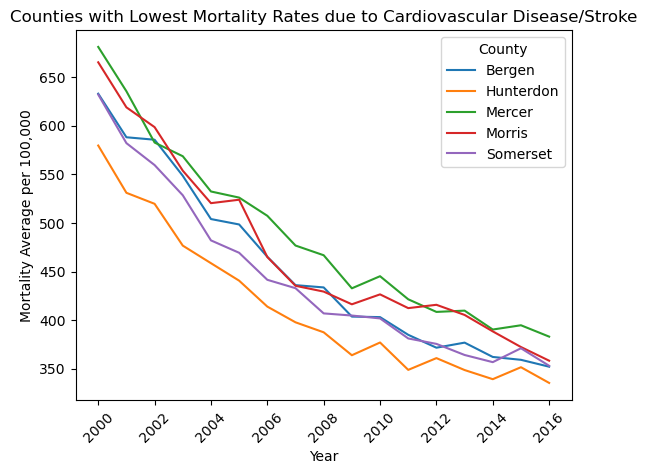

In [273]:
# Plot Graph with Top 5 with lowest mortality: Hunterdon, Bergen, Somerset, Morris, Mercer
bottom_5.pivot_table(values="Data_Value",index="Year",columns="County").plot()

plt.title("Counties with Lowest Mortality Rates due to Cardiovascular Disease/Stroke")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

Takeaway: These counties have varying degrees of density, but on the whole are more centrally located in this state. This puts them in closer proximity to healthcare. Moreover, several of these counties tend to have lower poverty rates. All of these factors may indicate why there are lower mortality rates due to heart disease, but further analysis, however, is required to determine the other compounding factors for these regions.

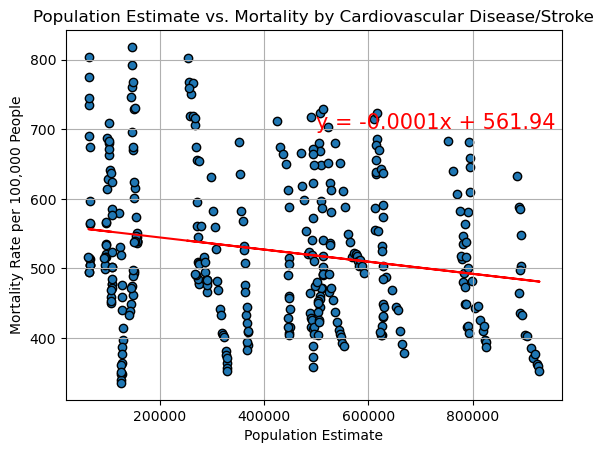

In [274]:
# Create scatterplot to compare Population Size to Mortality Rate
# Establish variables for plotting poverty comparison
x_values = nj_census_merged["Population Estimate"]
y_values = nj_census_merged["Data_Value"]

# Create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

# Plot Scatterplot
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (500000, 700), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Population Estimate vs. Mortality by Cardiovascular Disease/Stroke")
plt.ylabel("Mortality Rate per 100,000 People")
plt.xlabel("Population Estimate")
plt.grid(True)

# Save the figure
plt.savefig("output/LG_Fig_1.png")

plt.show()

Takeaway: While the graph shows a steep regression line, the annotated equation provides greater context that the slope is actually not significant. It only appears that way due to the large scale of the x axis, which spans near 1,000,000 (due to the population sizes of the various counties). This demonstrates that the population size of a county does not affect the county's mortality rate.

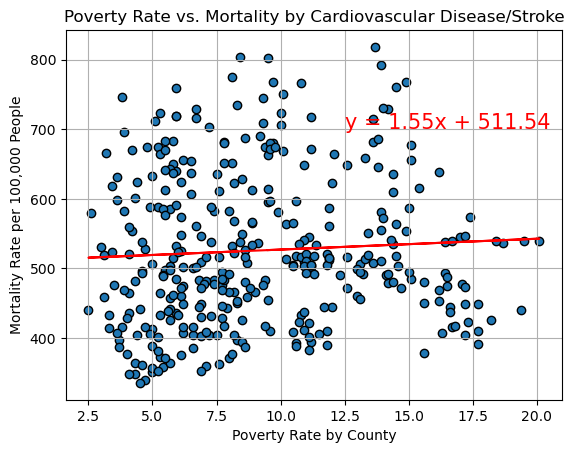

In [275]:
# Create scatterplot to compare Poverty Rate to Mortality Rate
# Establish variables for plotting poverty comparison
x_values = nj_census_merged["Poverty Rate"]
y_values = nj_census_merged["Data_Value"]

# Create linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Scatterplot
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (12.5, 700), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Poverty Rate vs. Mortality by Cardiovascular Disease/Stroke")
plt.ylabel("Mortality Rate per 100,000 People")
plt.xlabel("Poverty Rate by County")
plt.grid(True)

# Save the figure
plt.savefig("output/LG_Fig_2.png")

plt.show()

Takeaway: While the regression line does not appear to have a strong slope, it is still indicated on the annotated equation that there is a relationship between a county's poverty rate and mortality due to cardiovascular disease/stroke. This makes sense, as poverty often causes additional stress, limits an individual's access to healthy food and likely healthcare. All of these factors make an individual more suceptible to heart disease, but further study and statistical analysis is required to better understand the relationship between the two.